In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [94]:
os.getcwd()# to get current working dir
#pd.set_option("display.max_columns",None)

'G:\\Anaconda\\Work\\Project\\1'

In [95]:
data=pd.read_csv("https://github.com/Tehilbansal/Project-1/blob/main/crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [96]:
#MAX,MIN&AVG VALUES RELATED TO EACH TARGET VALUE
x=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
y=list(data["label"].unique())
for j in y:
    for i in x:
        print(j,end=" \n")
        print(i,end="\n")
        print("average_value: ",data[data["label"]==j][i].mean())
        print("min_value: ",data[data["label"]==j][i].min())
        print("max_value: ",data[data["label"]==j][i].max())
    

rice 
N
average_value:  79.89
min_value:  60
max_value:  99
rice 
P
average_value:  47.58
min_value:  35
max_value:  60
rice 
K
average_value:  39.87
min_value:  35
max_value:  45
rice 
temperature
average_value:  23.689332210500005
min_value:  20.0454142
max_value:  26.92995077
rice 
humidity
average_value:  82.2728215389
min_value:  80.12267476
max_value:  84.96907151
rice 
ph
average_value:  6.425470922139999
min_value:  5.005306977
max_value:  7.868474653
rice 
rainfall
average_value:  236.1811135939999
min_value:  182.5616319
max_value:  298.5601175
maize 
N
average_value:  77.76
min_value:  60
max_value:  100
maize 
P
average_value:  48.44
min_value:  35
max_value:  60
maize 
K
average_value:  19.79
min_value:  15
max_value:  25
maize 
temperature
average_value:  22.389203910200003
min_value:  18.04185513
max_value:  26.54986394
maize 
humidity
average_value:  65.09224944670001
min_value:  55.28220433
max_value:  74.82913698
maize 
ph
average_value:  6.245189722399997
min_value: 

min_value:  120
max_value:  145
apple 
K
average_value:  199.89
min_value:  195
max_value:  205
apple 
temperature
average_value:  22.6309424132
min_value:  21.0365275
max_value:  23.99686172
apple 
humidity
average_value:  92.33338287560004
min_value:  90.02575116
max_value:  94.92048112
apple 
ph
average_value:  5.9296629318099985
min_value:  5.514253142
max_value:  6.4992268210000015
apple 
rainfall
average_value:  112.65477927500005
min_value:  100.1173443
max_value:  124.9831618
orange 
N
average_value:  19.58
min_value:  0
max_value:  40
orange 
P
average_value:  16.55
min_value:  5
max_value:  30
orange 
K
average_value:  10.01
min_value:  5
max_value:  15
orange 
temperature
average_value:  22.765725496699996
min_value:  10.01081312
max_value:  34.90665289
orange 
humidity
average_value:  92.17020876340004
min_value:  90.00621688
max_value:  94.96419851
orange 
ph
average_value:  7.01695745276
min_value:  6.010391864
max_value:  7.995848977
orange 
rainfall
average_value:  110.

In [97]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [98]:
data.shape 

(2200, 8)

In [99]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [100]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [101]:
data[data.duplicated()].sum()

N              0.0
P              0.0
K              0.0
temperature    0.0
humidity       0.0
ph             0.0
rainfall       0.0
label          0.0
dtype: float64

In [102]:
data["ph"]=data["ph"].astype("int64")
data["temperature"]=data["temperature"].astype("int64")
data["humidity"]=data["humidity"].astype("int64")
data["rainfall"]=data["rainfall"].astype("int64")

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   N            2200 non-null   int64 
 1   P            2200 non-null   int64 
 2   K            2200 non-null   int64 
 3   temperature  2200 non-null   int64 
 4   humidity     2200 non-null   int64 
 5   ph           2200 non-null   int64 
 6   rainfall     2200 non-null   int64 
 7   label        2200 non-null   object
dtypes: int64(7), object(1)
memory usage: 137.6+ KB


In [104]:
data.describe() #stats measurments of data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.120000,70.976364,5.950000,102.970000
std,36.917334,32.985883,50.647931,5.062696,22.263427,0.824395,54.948949
min,0.000000,5.000000,5.000000,8.000000,14.000000,3.000000,20.000000
25%,21.000000,28.000000,20.000000,22.000000,60.000000,5.000000,64.000000
50%,37.000000,51.000000,32.000000,25.000000,80.000000,6.000000,94.000000
75%,84.250000,68.000000,49.000000,28.000000,89.000000,6.000000,124.000000
max,140.000000,145.000000,205.000000,43.000000,99.000000,9.000000,298.000000


In [105]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

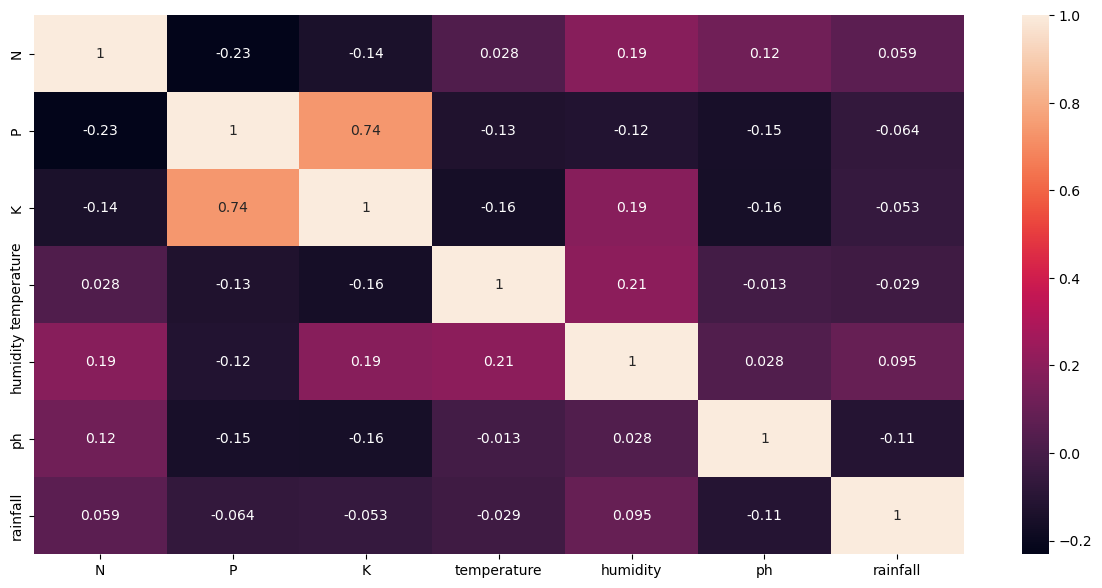

In [106]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()


G:\Anaconda\Software\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


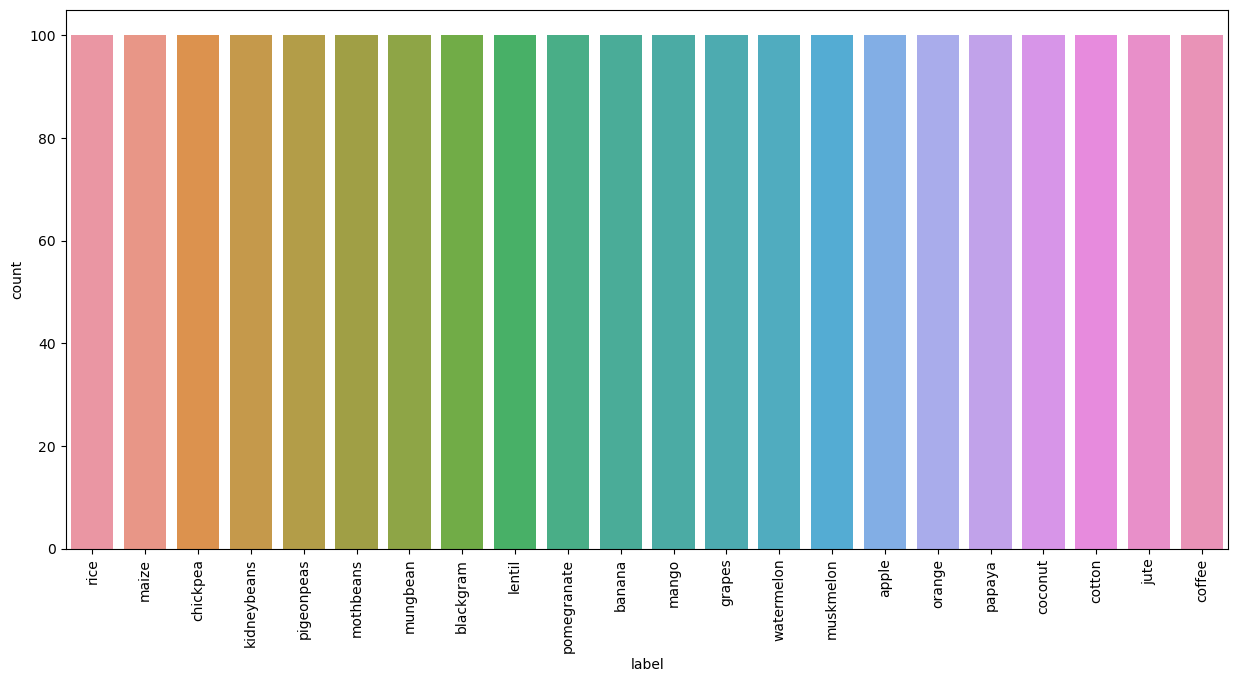

In [107]:
plt.figure(figsize=(15,7))
sns.countplot(data["label"])
plt.xticks(rotation=90)
plt.show()


G:\Anaconda\Software\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


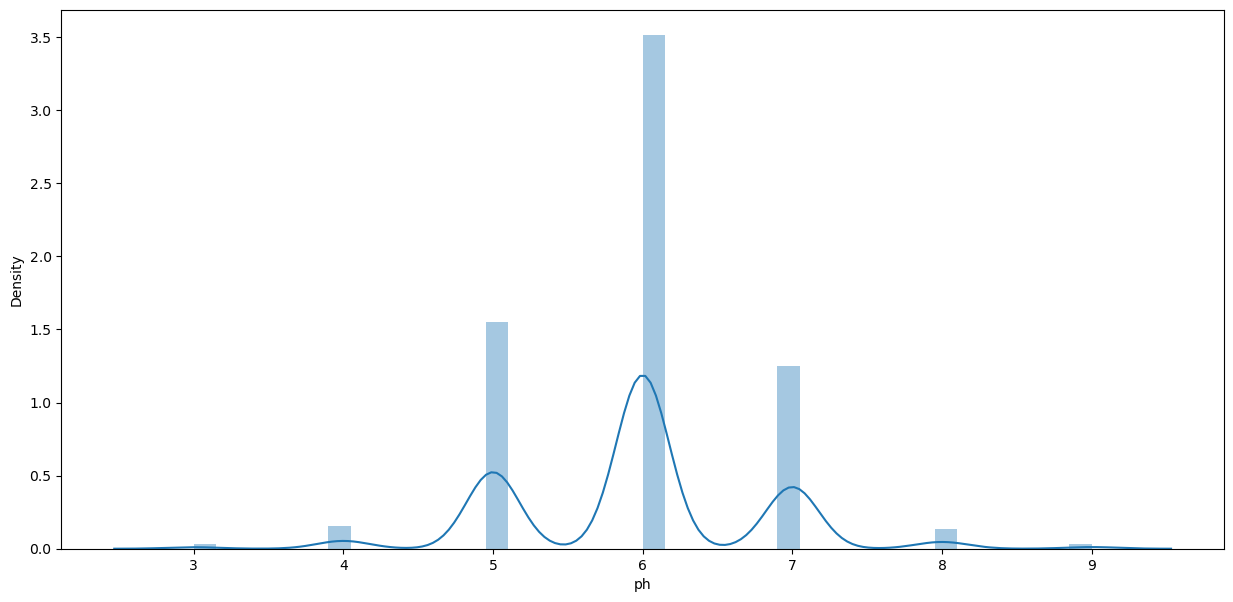

In [108]:
plt.figure(figsize=(15,7))
sns.distplot(data["ph"])
plt.show()

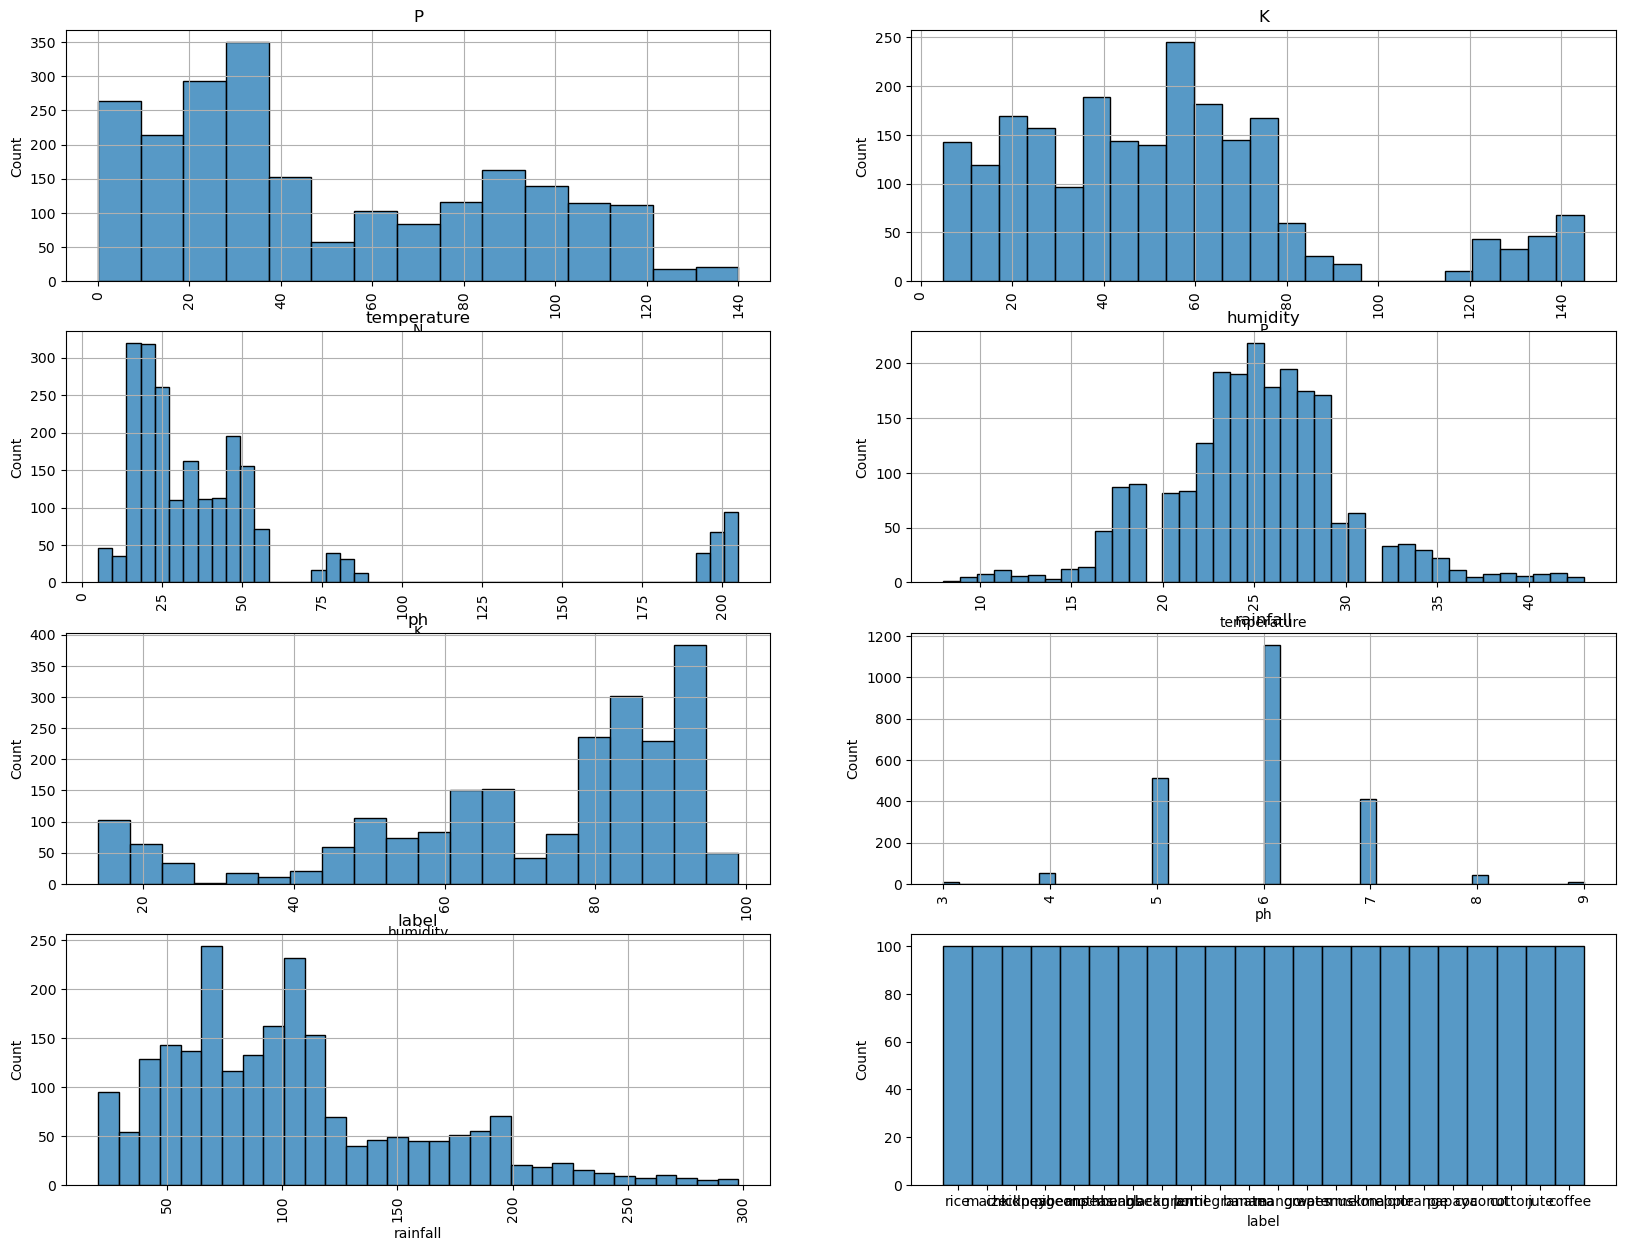

In [109]:
col=data.columns
plt.figure(figsize=(20,15))
for i,c in enumerate(data.columns):
    plt.title(c)
    plt.grid()
    plt.xticks(rotation=90)
    plt.subplot(4,2,i+1)
    sns.histplot(data[c])

In [110]:
input=data.drop("label",axis=1)
output=data["label"]

In [111]:
sc=StandardScaler()
input_sc=sc.fit_transform(input)

In [112]:
input_sc

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.49525809,
         0.06066433,  1.80262801],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.40540424,
         1.27395087,  2.23949635],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.49525809,
         1.27395087,  2.91300171],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.17864579,
         0.06066433,  1.27474542],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.85254968,
         0.06066433,  0.43741443],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49313428,
         0.06066433,  0.67405145]])

In [118]:
x_train,x_test,y_train,y_test=train_test_split(input_sc,output,test_size=0.2,random_state=2,stratify=output)

In [119]:
x_train.shape

(1760, 7)

In [120]:
x_test.shape

(440, 7)

In [122]:
y_train.shape

(1760,)

In [123]:
y_test.shape

(440,)

# LOGISTIC REGRESSION MODEL

In [26]:
from sklearn.linear_model import LogisticRegression

In [124]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

G:\Anaconda\Software\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
test_pred=log_model.predict(x_test)
test_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'cotton', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'mothbeans', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon',

In [29]:
trainl_pred=log_model.predict(x_train)
trainl_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [30]:
y_train

1432    muskmelon
1978       cotton
504     mothbeans
1459    muskmelon
843        lentil
          ...    
682      mungbean
223      chickpea
1114        mango
1155        mango
1687       orange
Name: label, Length: 1760, dtype: object

In [31]:
accuracy_score(y_train,trainl_pred)

0.9761363636363637

In [32]:
log_model_training_accuracy_score=accuracy_score(y_train,trainl_pred)

cm=confusion_matrix(y_train,trainl_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trainl_pred))
print("classification_report:",classification_report(y_train,trainl_pred))
print("confusion_matrix:",cm)

TRAINING DATA SCORES
accuracy_score: 0.9761363636363637
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       0.94      0.96      0.95        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       0.99      1.00      0.99        80
      cotton       0.99      0.97      0.98        80
      grapes       1.00      1.00      1.00        80
        jute       0.88      0.91      0.90        80
 kidneybeans       0.96      0.99      0.98        80
      lentil       0.96      0.97      0.97        80
       maize       0.98      0.99      0.98        80
       mango       0.99      1.00      0.99        80
   mothbeans       0.99      0.94      0.96        80
    mungbean       0.99      1.00      0.99        80
   muskmelon       1.00      1.00      1.00        80
  

In [33]:
#plt.matshow(confusion_matrix,cmap="gray")

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF LOG MODEL'}>

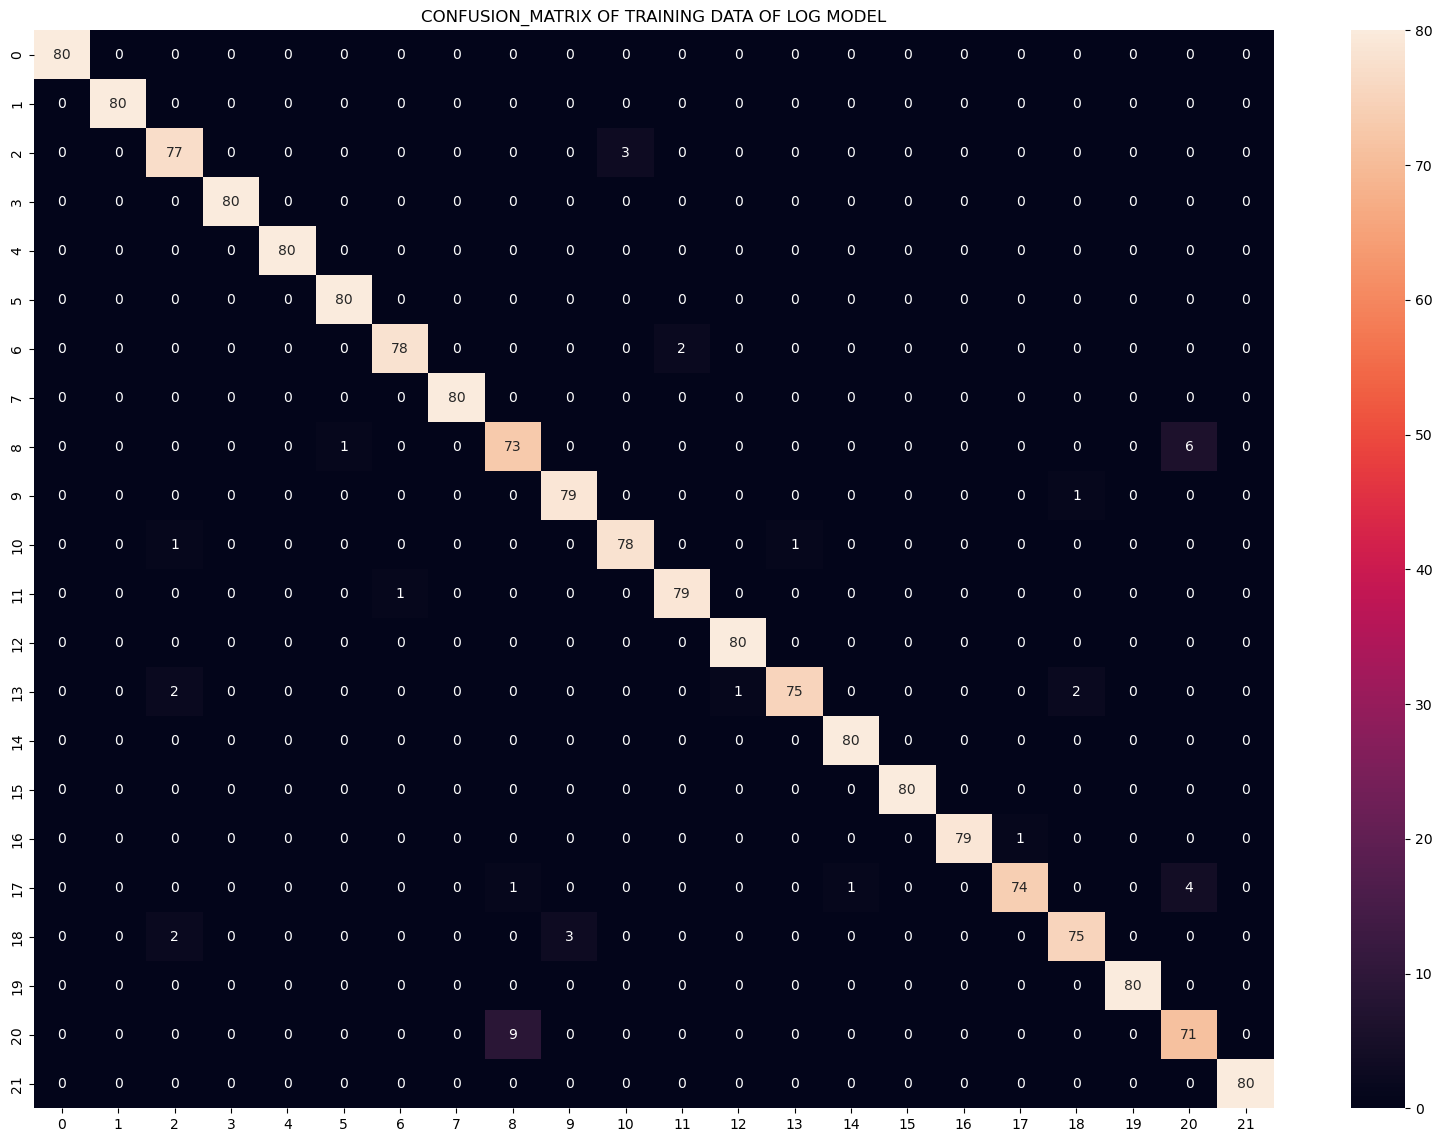

In [34]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF LOG MODEL")
sns.heatmap(cm,annot=True)

In [35]:
testl_pred=log_model.predict(x_test)
testl_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'cotton', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'mothbeans', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon',

In [36]:
log_model_testing_accuracy_score=accuracy_score(y_test,testl_pred)
cm1=confusion_matrix(y_test,testl_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",log_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cm1)

TESTING DATA SCORES
accuracy_score: 0.9727272727272728
classification_report: <function classification_report at 0x00000261153A5820>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 17  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF LOG MODEL'}>

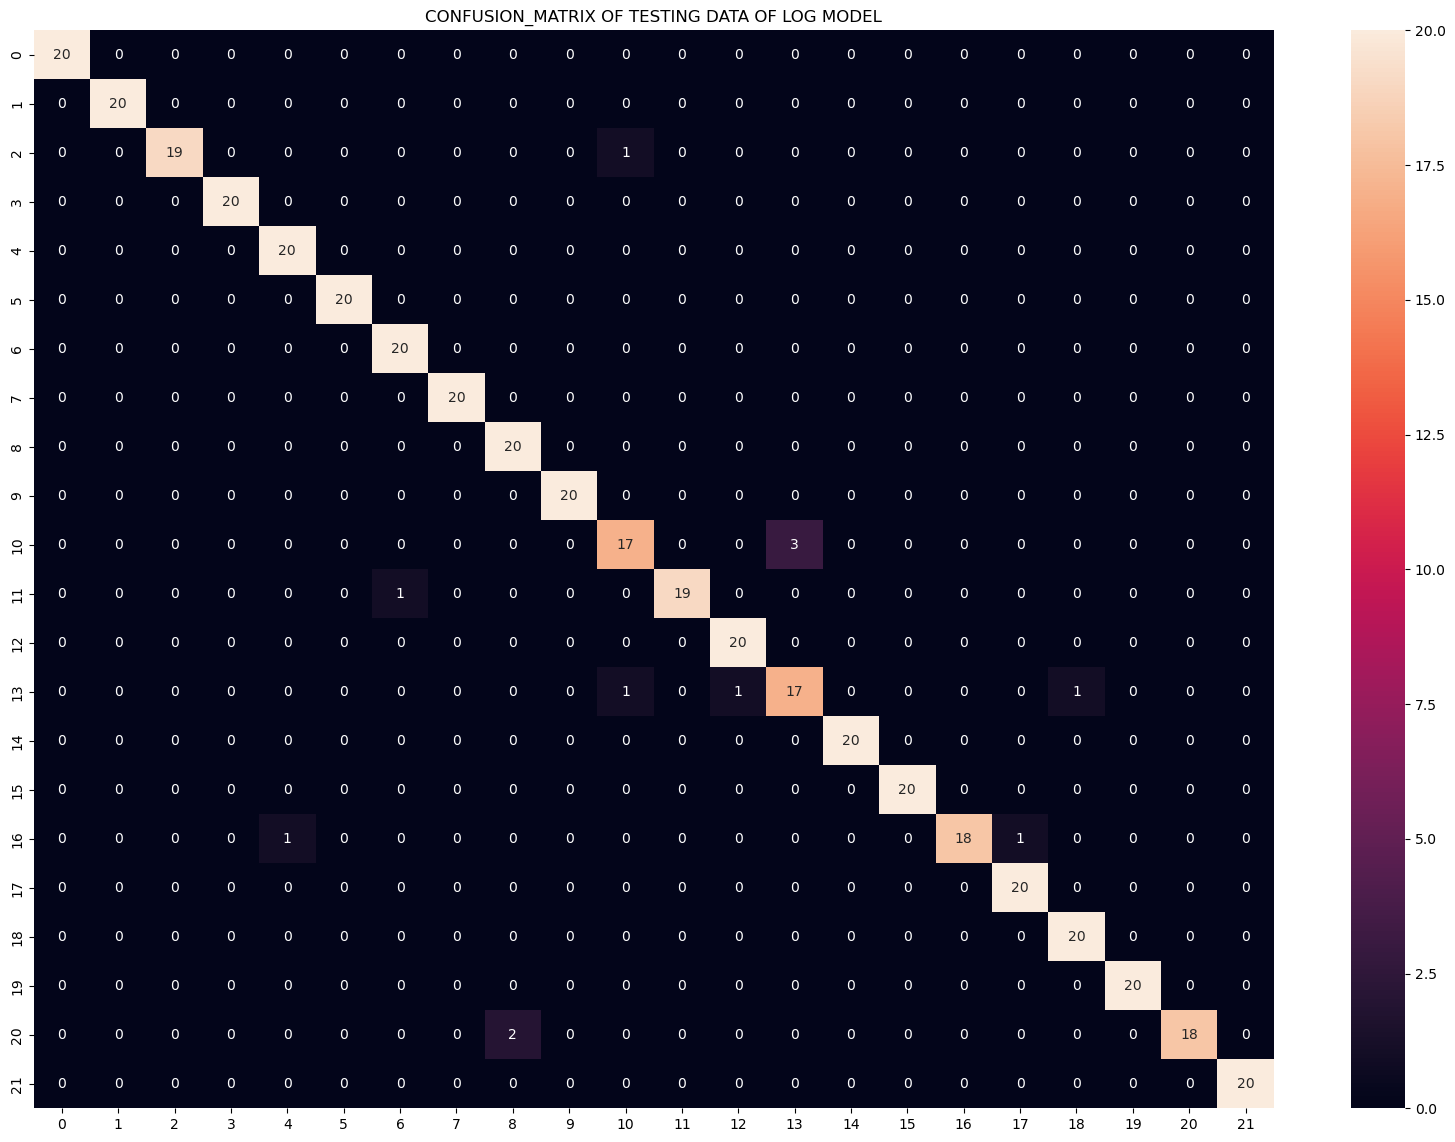

In [37]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF LOG MODEL")
sns.heatmap(cm1,annot=True)

# KNN model

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knc_model=KNeighborsClassifier()

In [39]:
#GridSearchCv

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters={"n_neighbors":[i for i in range(2,100)]}
parameters

{'n_neighbors': [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99]}

In [42]:
mod=GridSearchCV(estimator=knc_model,param_grid=parameters,scoring="accuracy",refit=False)

In [43]:
mod.fit(x_train,y_train)

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]},
             refit=False, scoring='accuracy')

In [44]:
mod.estimator

KNeighborsClassifier()

In [45]:
mod.best_params_

{'n_neighbors': 3}

In [46]:
knc_model=KNeighborsClassifier(n_neighbors=3)

In [47]:
knc_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [48]:
traink_pred=knc_model.predict(x_train)
traink_pred

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [49]:
testk_pred=knc_model.predict(x_test)
testk_pred

G:\Anaconda\Software\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'maize', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'jute', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'lentil', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon', 'ma

In [50]:
knc_model_training_accuracy_score=accuracy_score(y_train,traink_pred)

cmk=confusion_matrix(y_train,traink_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,traink_pred))
print("classification_report:",classification_report(y_train,traink_pred))
print("confusion_matrix:",cmk)

TRAINING DATA SCORES
accuracy_score: 0.9920454545454546
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       0.96      1.00      0.98        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      0.97      0.99        80
      cotton       0.98      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.93      0.99      0.96        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       0.98      0.99      0.98        80
       maize       1.00      0.97      0.99        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      0.96      0.98        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF KNC MODEL'}>

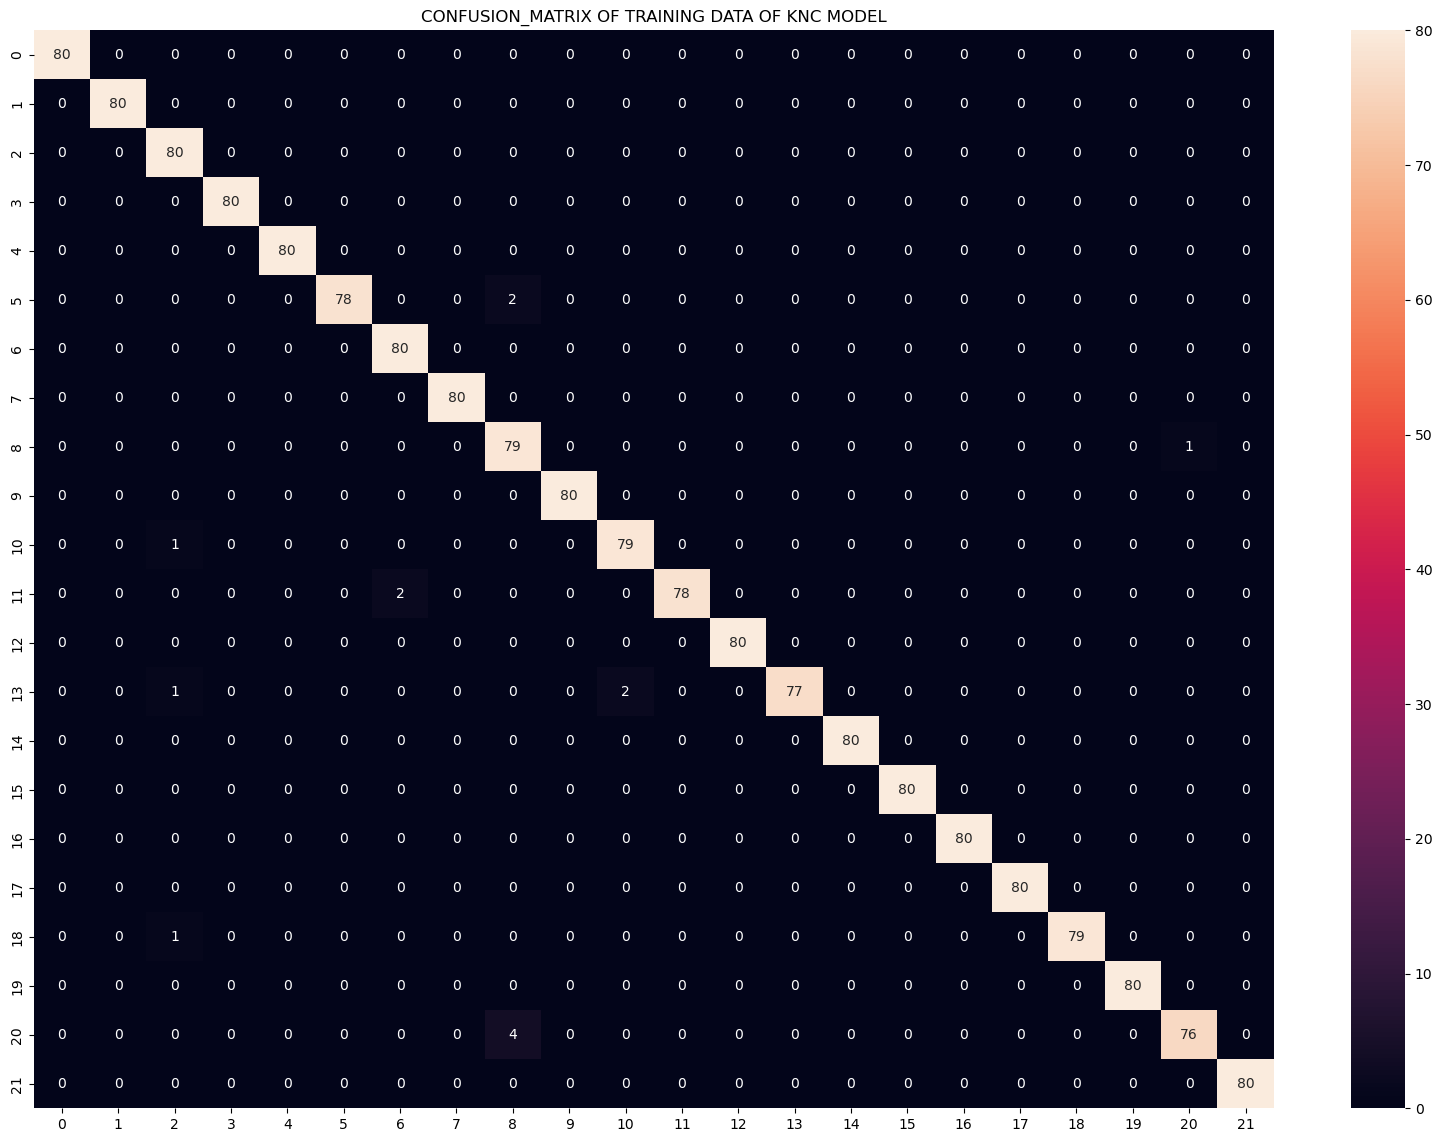

In [51]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF KNC MODEL")
sns.heatmap(cmk,annot=True)

In [52]:
knc_model_testing_accuracy_score=accuracy_score(y_test,testk_pred)
cmkt=confusion_matrix(y_test,testk_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",knc_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmkt)

TESTING DATA SCORES
accuracy_score: 0.9840909090909091
classification_report: <function classification_report at 0x00000261153A5820>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 19  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF KNC MODEL'}>

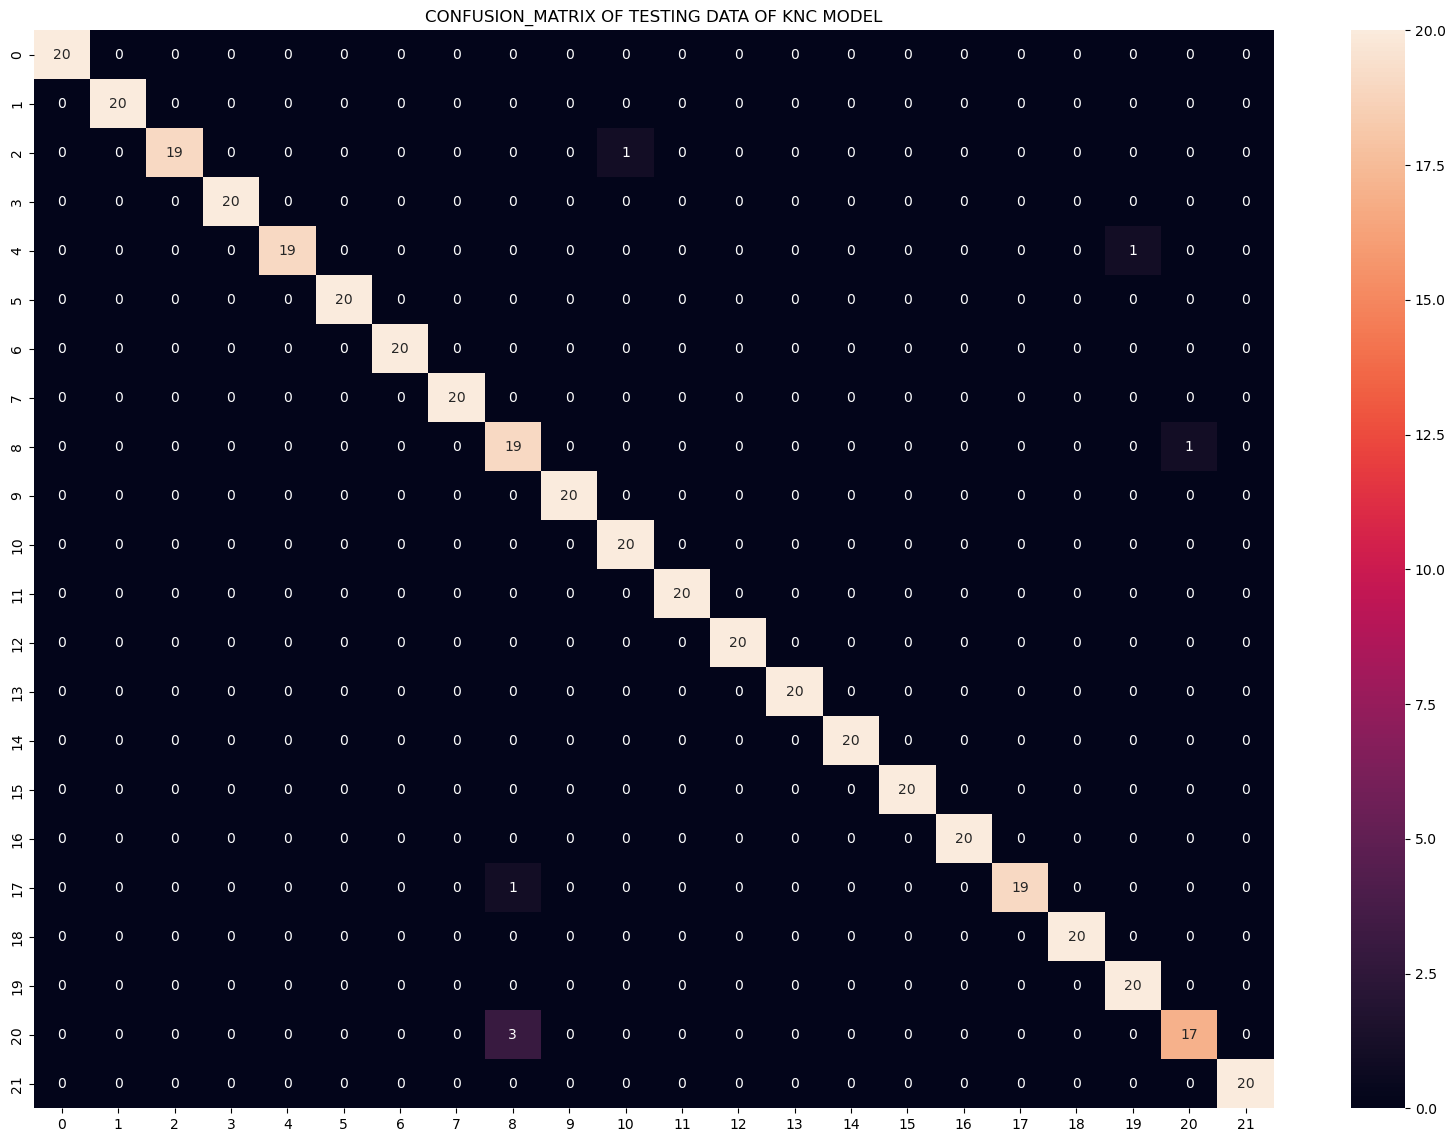

In [53]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF KNC MODEL")
sns.heatmap(cmkt,annot=True)

# NAIVE BAYES MODEL

In [54]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()

In [55]:
naive_model.fit(x_train,y_train)

GaussianNB()

In [56]:
trainn_pred=naive_model.predict(x_train)
trainn_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype='<U11')

In [57]:
testn_pred=naive_model.predict(x_test)
testn_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'rice',
       'muskmelon', 'mango', 'maize', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'rice', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'lentil', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon', 'ma

In [58]:
naive_model_training_accuracy_score=accuracy_score(y_train,trainn_pred)

cmn=confusion_matrix(y_train,trainn_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trainn_pred))
print("classification_report:",classification_report(y_train,trainn_pred))
print("confusion_matrix:",cmn)

TRAINING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       0.98      1.00      0.99        80
      grapes       1.00      1.00      1.00        80
        jute       0.94      0.99      0.96        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      0.97      0.99        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      1.00      1.00        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF NAIVE MODEL'}>

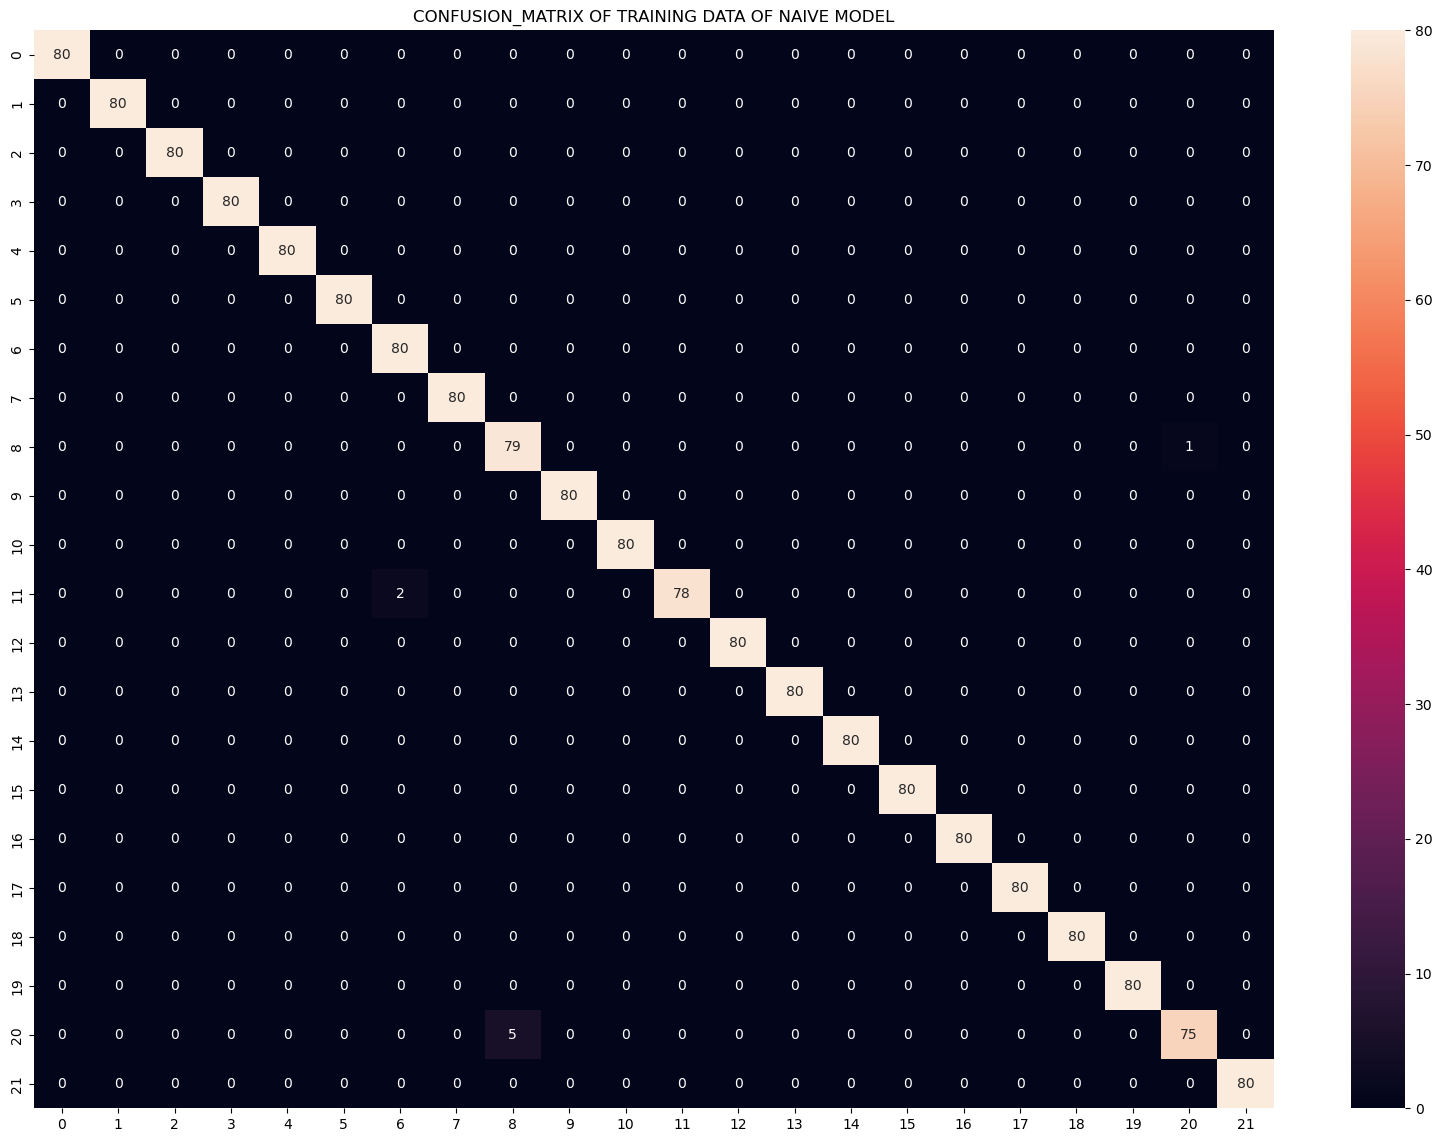

In [59]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF NAIVE MODEL")
sns.heatmap(cmn,annot=True)

In [60]:
naive_model_testing_accuracy_score=accuracy_score(y_test,testn_pred)
cmnt=confusion_matrix(y_test,testn_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",naive_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmnt)

TESTING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report: <function classification_report at 0x00000261153A5820>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF NAIVE MODEL'}>

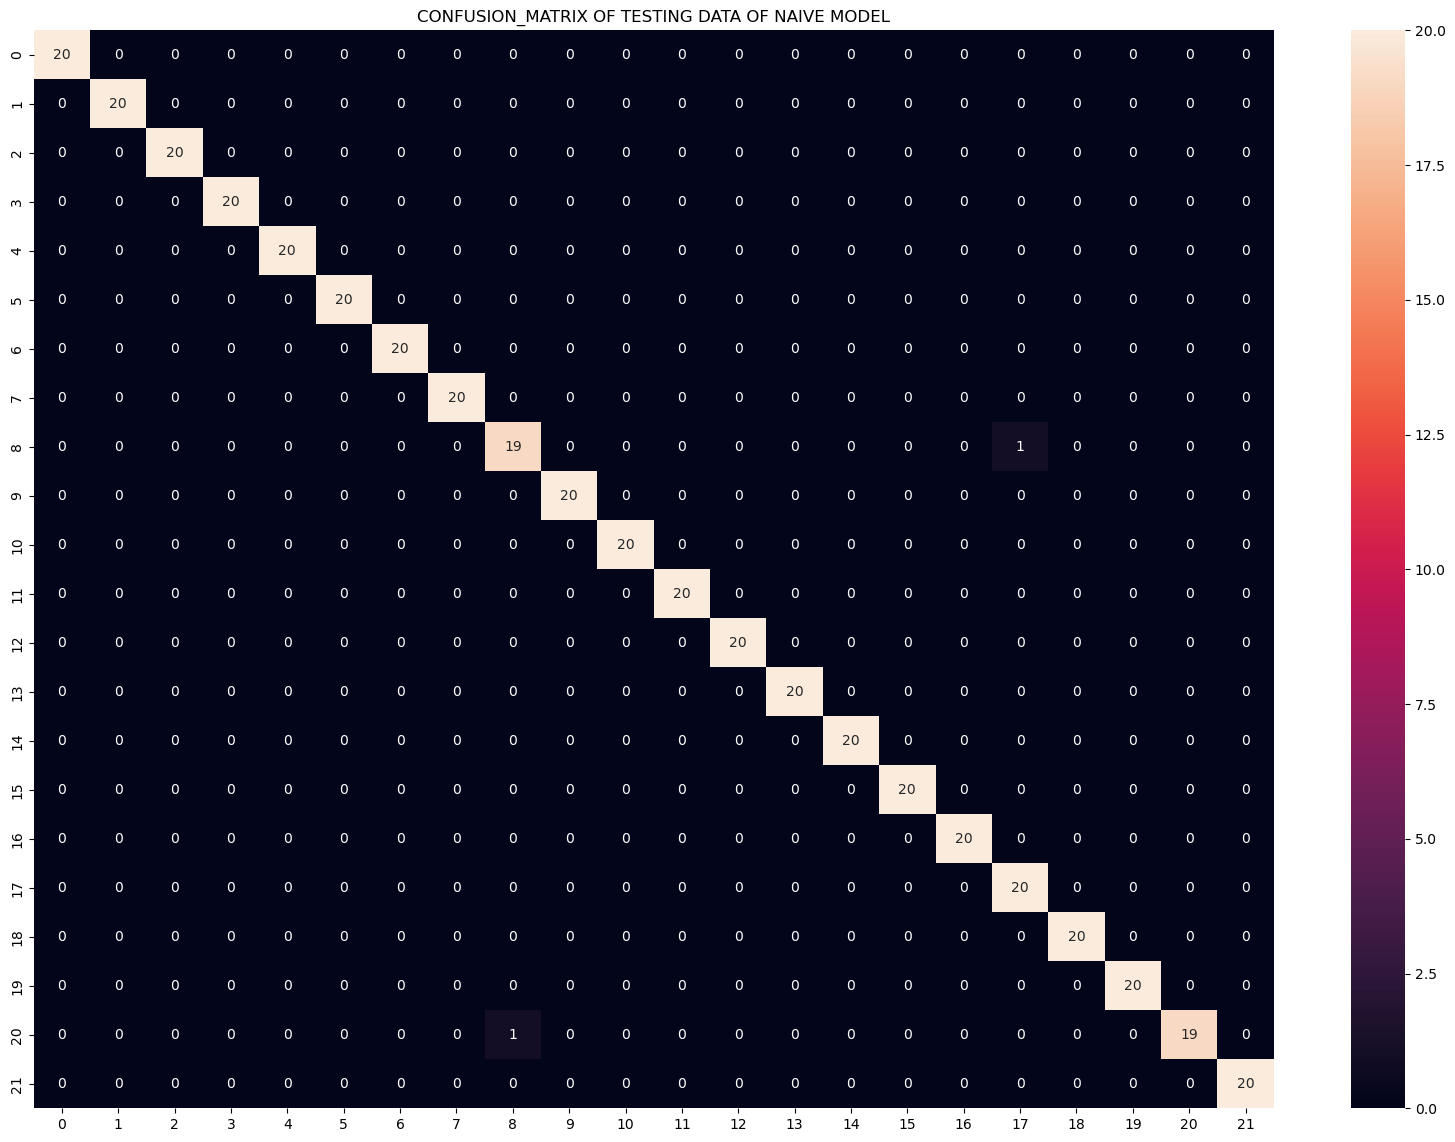

In [61]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF NAIVE MODEL")
sns.heatmap(cmnt,annot=True)

# DECISION TREE CLASSIFIER

In [62]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()


In [63]:
parameters={"criterion":["gini","entropy"],"max_depth":[3,5,7]}
mod=GridSearchCV(estimator=tree_model,param_grid=parameters,refit=False)

In [64]:
mod.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7]},
             refit=False)

In [65]:
mod.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [66]:
tree_model=DecisionTreeClassifier(criterion="entropy",max_depth=7)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

[]

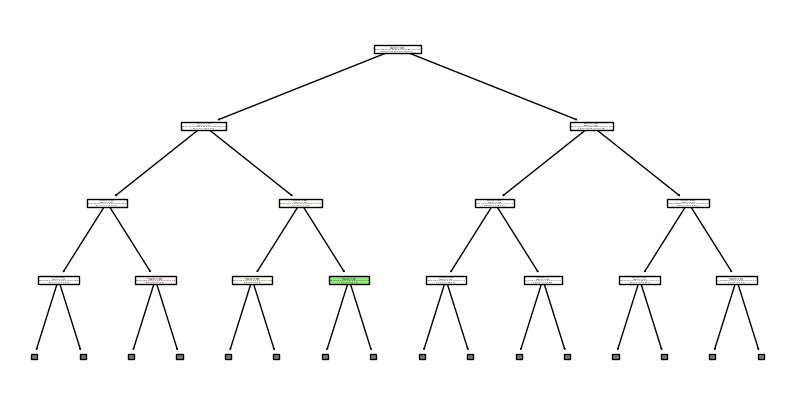

In [67]:
plt.figure(figsize=(10,5))
tree.plot_tree(tree_model,filled=True,feature_names=data.columns,max_depth=3)
plt.plot()

In [68]:
tree.export_text(tree_model)

'|--- feature_4 <= 0.16\n|   |--- feature_2 <= -0.45\n|   |   |--- feature_6 <= -0.52\n|   |   |   |--- feature_6 <= -0.80\n|   |   |   |   |--- feature_4 <= -0.52\n|   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |--- feature_4 >  -0.52\n|   |   |   |   |   |--- feature_1 <= -0.10\n|   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |   |--- feature_1 >  -0.10\n|   |   |   |   |   |   |--- feature_3 <= 0.87\n|   |   |   |   |   |   |   |--- class: lentil\n|   |   |   |   |   |   |--- feature_3 >  0.87\n|   |   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |--- feature_6 >  -0.80\n|   |   |   |   |--- feature_0 <= 0.24\n|   |   |   |   |   |--- feature_4 <= -0.54\n|   |   |   |   |   |   |--- feature_4 <= -1.73\n|   |   |   |   |   |   |   |--- class: kidneybeans\n|   |   |   |   |   |   |--- feature_4 >  -1.73\n|   |   |   |   |   |   |   |--- class: mothbeans\n|   |   |   |   |   |--- feature_4 >  -0.54\n|   |   |   |   |   |   |--- feature_1 <= 0.00\n| 

In [69]:
traint_pred=tree_model.predict(x_train)
traint_pred

array(['muskmelon', 'cotton', 'mothbeans', ..., 'mango', 'mango',
       'orange'], dtype=object)

In [70]:
testt_pred=tree_model.predict(x_test)
testt_pred

array(['watermelon', 'jute', 'banana', 'banana', 'papaya', 'jute',
       'muskmelon', 'mango', 'maize', 'mungbean', 'mungbean', 'papaya',
       'banana', 'kidneybeans', 'jute', 'watermelon', 'apple', 'banana',
       'mango', 'grapes', 'muskmelon', 'watermelon', 'coconut', 'orange',
       'blackgram', 'blackgram', 'papaya', 'pigeonpeas', 'banana',
       'grapes', 'pomegranate', 'mothbeans', 'mango', 'blackgram',
       'mothbeans', 'pomegranate', 'watermelon', 'cotton', 'coconut',
       'coconut', 'grapes', 'watermelon', 'coconut', 'rice', 'maize',
       'lentil', 'pigeonpeas', 'chickpea', 'coffee', 'cotton', 'mungbean',
       'lentil', 'jute', 'cotton', 'chickpea', 'banana', 'banana',
       'coconut', 'rice', 'cotton', 'grapes', 'lentil', 'jute', 'lentil',
       'jute', 'muskmelon', 'grapes', 'orange', 'mothbeans', 'apple',
       'chickpea', 'banana', 'coconut', 'rice', 'jute', 'grapes',
       'grapes', 'coconut', 'jute', 'pigeonpeas', 'pigeonpeas',
       'watermelon', 'ma

In [71]:
tree_model_training_accuracy_score=accuracy_score(y_train,traint_pred)

cmt=confusion_matrix(y_train,traint_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,traint_pred))
print("classification_report:",classification_report(y_train,traint_pred))
print("confusion_matrix:",cmt)

TRAINING DATA SCORES
accuracy_score: 0.990909090909091
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       0.99      1.00      0.99        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00        80
        jute       0.84      1.00      0.91        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      1.00      1.00        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      0.99      0.99        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
   

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF DTC MODEL'}>

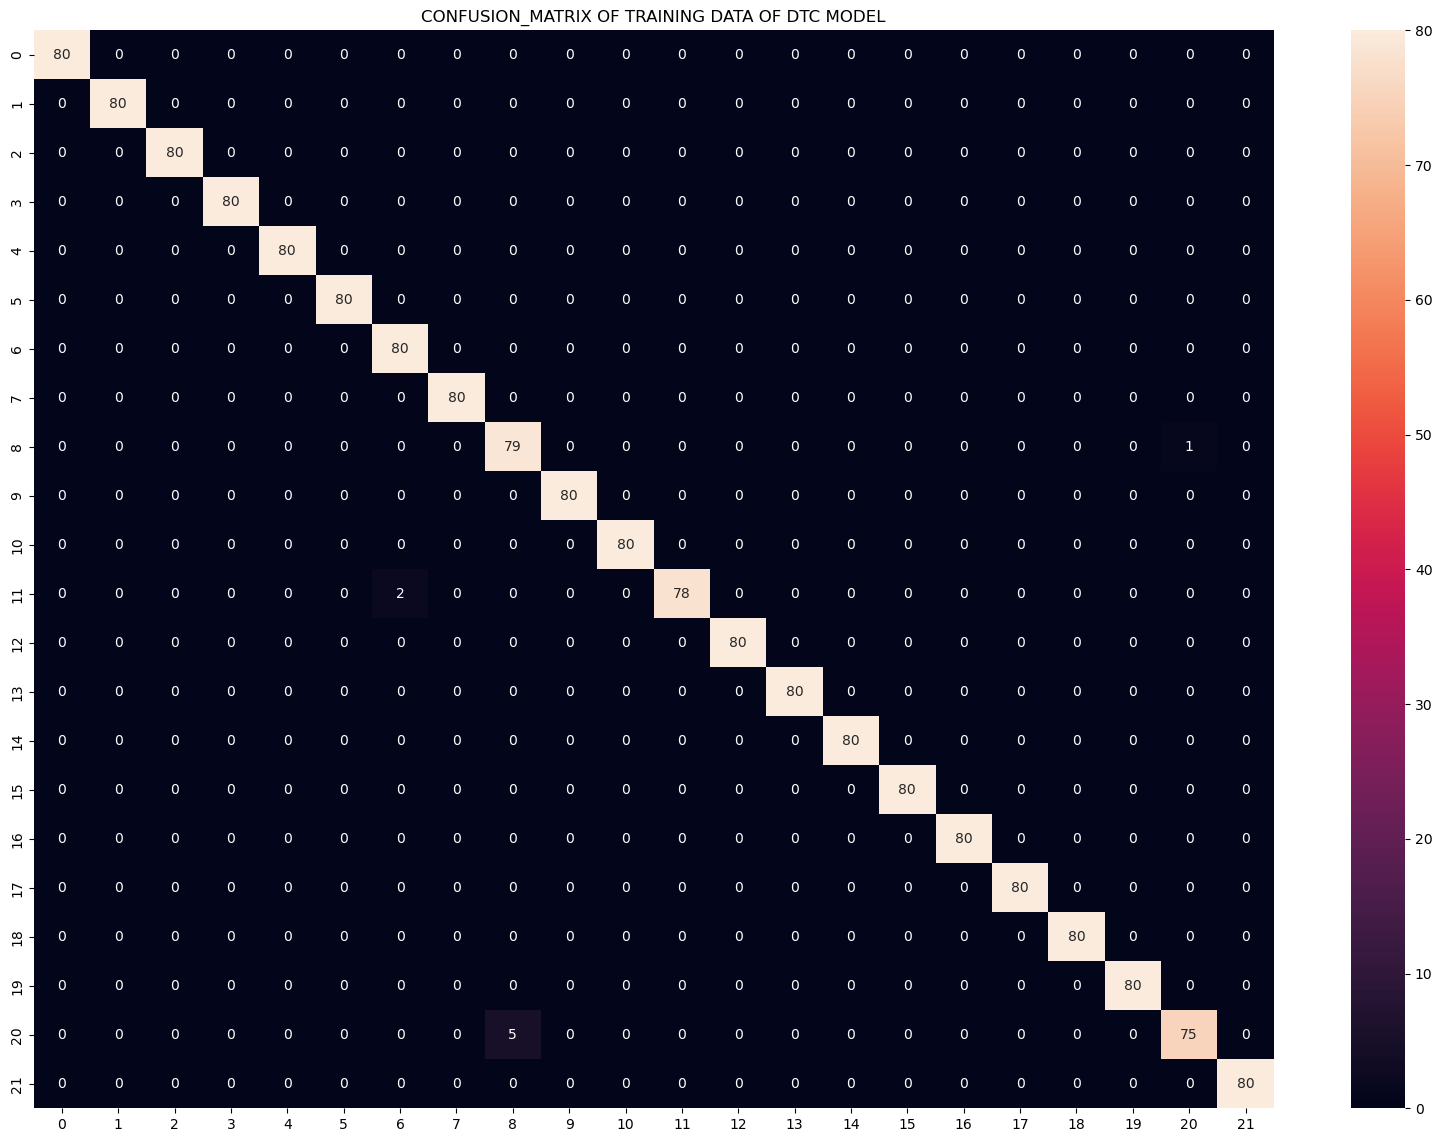

In [72]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF DTC MODEL")
sns.heatmap(cmn,annot=True)

In [73]:
tree_model_testing_accuracy_score=accuracy_score(y_test,testt_pred)
cmtt=confusion_matrix(y_test,testt_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",tree_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmtt)

TESTING DATA SCORES
accuracy_score: 0.990909090909091
classification_report: <function classification_report at 0x00000261153A5820>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF DCT MODEL'}>

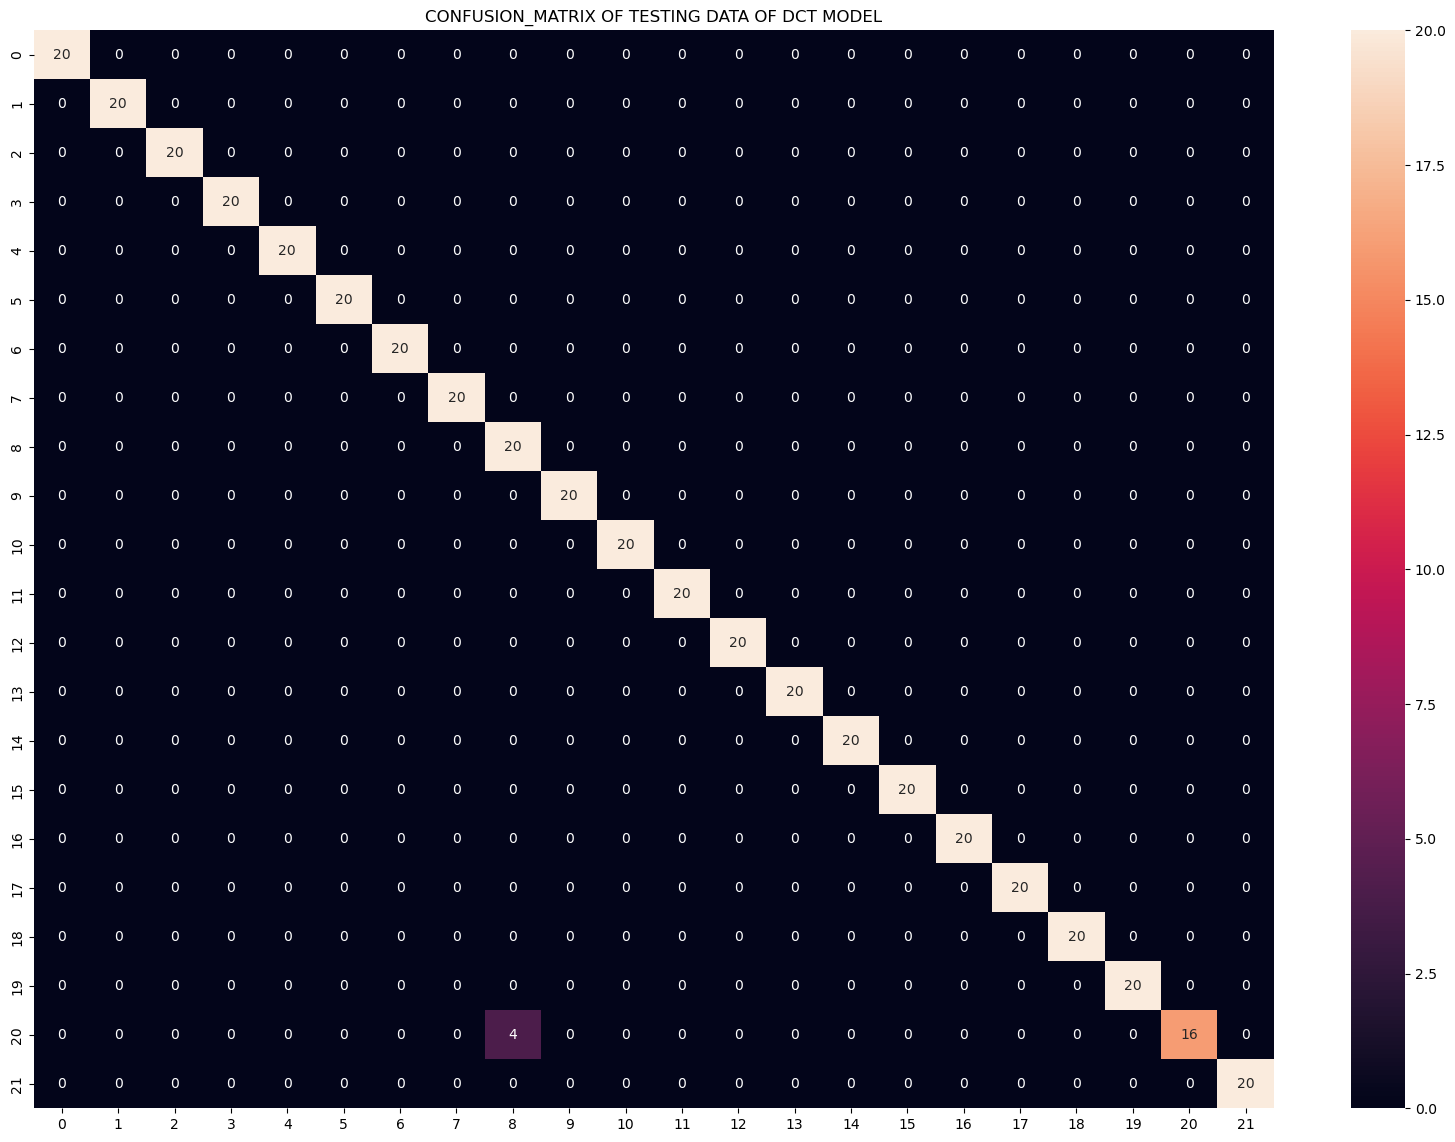

In [74]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF DCT MODEL")
sns.heatmap(cmtt,annot=True)

# STACKING MODEL

In [75]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
stack_model=StackingClassifier(estimators=[("m1",tree_model),("m2",naive_model),("m3",log_model)],final_estimator=RandomForestClassifier())

In [76]:
stack_model.fit(x_train,y_train)

G:\Anaconda\Software\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
G:\Anaconda\Software\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

StackingClassifier(estimators=[('m1',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=7)),
                               ('m2', GaussianNB()),
                               ('m3', LogisticRegression())],
                   final_estimator=RandomForestClassifier())

In [77]:
trains_pred=stack_model.predict(x_train)

In [78]:
tests_pred=stack_model.predict(x_test)

In [79]:
stack_model_training_accuracy_score=accuracy_score(y_train,trains_pred)

cms=confusion_matrix(y_train,trains_pred)
print("TRAINING DATA SCORES")
print("accuracy_score:",accuracy_score(y_train,trains_pred))
print("classification_report:",classification_report(y_train,trains_pred))
print("confusion_matrix:",cms)

TRAINING DATA SCORES
accuracy_score: 0.9982954545454545
classification_report:               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        80
      banana       1.00      1.00      1.00        80
   blackgram       1.00      1.00      1.00        80
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        80
      coffee       1.00      1.00      1.00        80
      cotton       1.00      1.00      1.00        80
      grapes       1.00      1.00      1.00        80
        jute       0.98      0.99      0.98        80
 kidneybeans       1.00      1.00      1.00        80
      lentil       1.00      1.00      1.00        80
       maize       1.00      1.00      1.00        80
       mango       1.00      1.00      1.00        80
   mothbeans       1.00      1.00      1.00        80
    mungbean       1.00      1.00      1.00        80
   muskmelon       1.00      1.00      1.00        80
  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TRAINING DATA OF STACKING  MODEL'}>

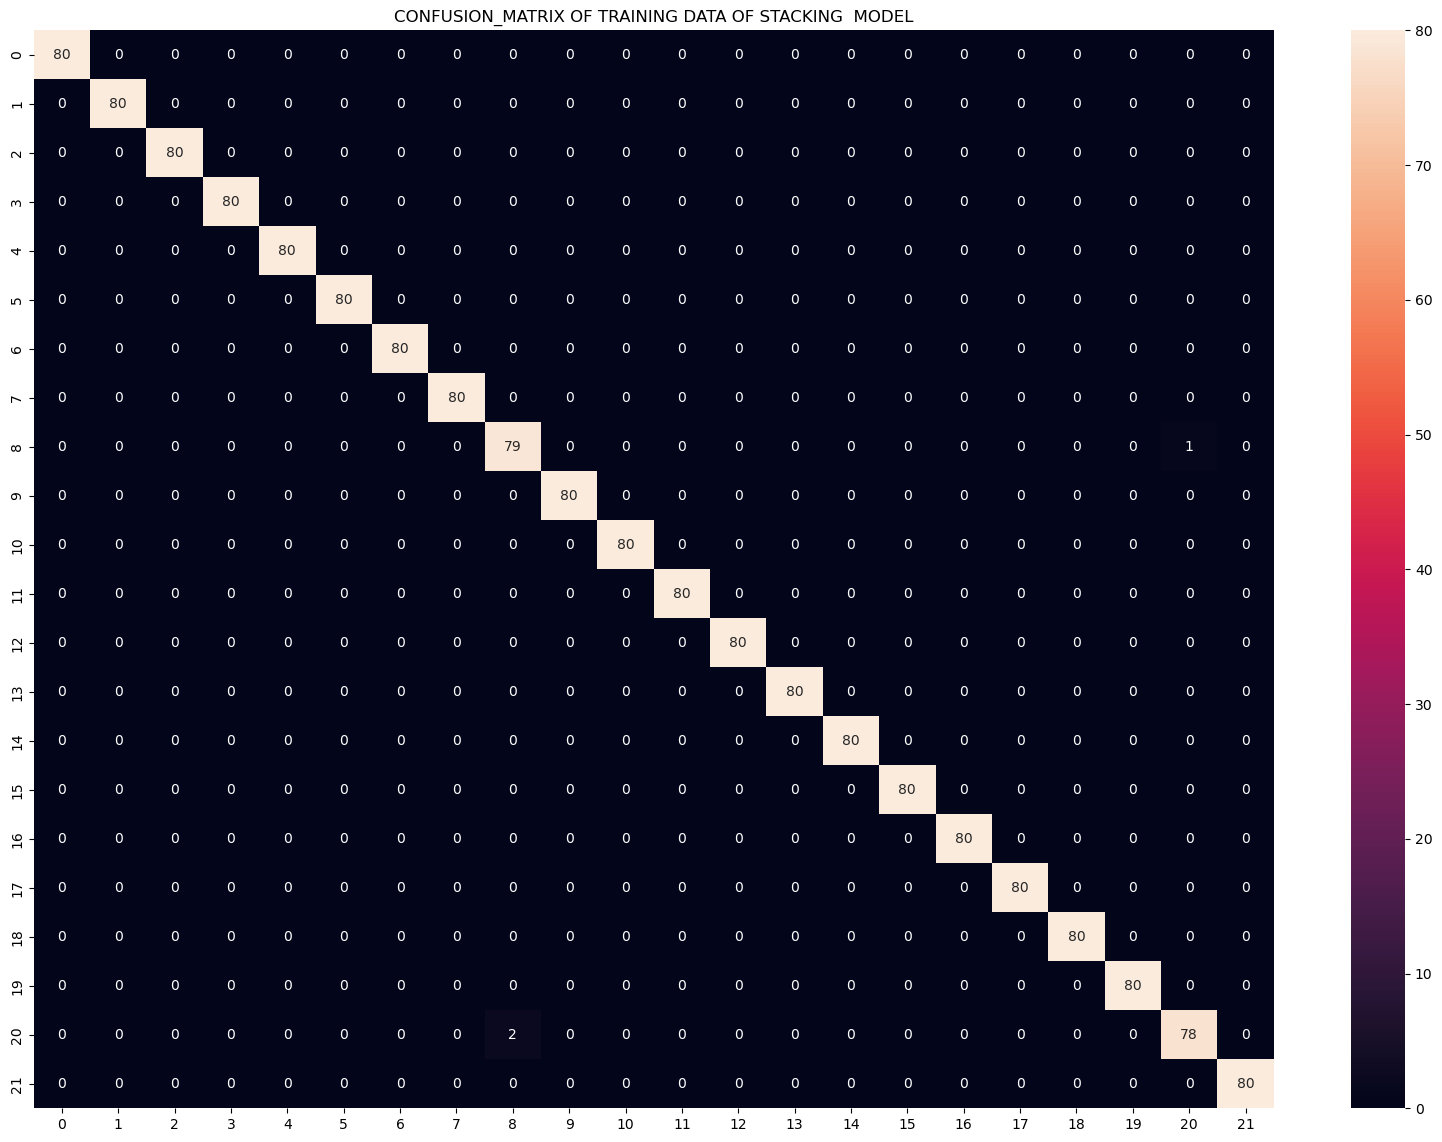

In [80]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TRAINING DATA OF STACKING  MODEL")
sns.heatmap(cms,annot=True)

In [81]:
stack_model_testing_accuracy_score=accuracy_score(y_test,tests_pred)
cmst=confusion_matrix(y_test,tests_pred)

print("TESTING DATA SCORES")
print("accuracy_score:",stack_model_testing_accuracy_score)
print("classification_report:",classification_report)
print("confusion_matrix:",cmst)

TESTING DATA SCORES
accuracy_score: 0.9954545454545455
classification_report: <function classification_report at 0x00000261153A5820>
confusion_matrix: [[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  

<AxesSubplot:title={'center':'CONFUSION_MATRIX OF TESTING DATA OF STACKING MODEL'}>

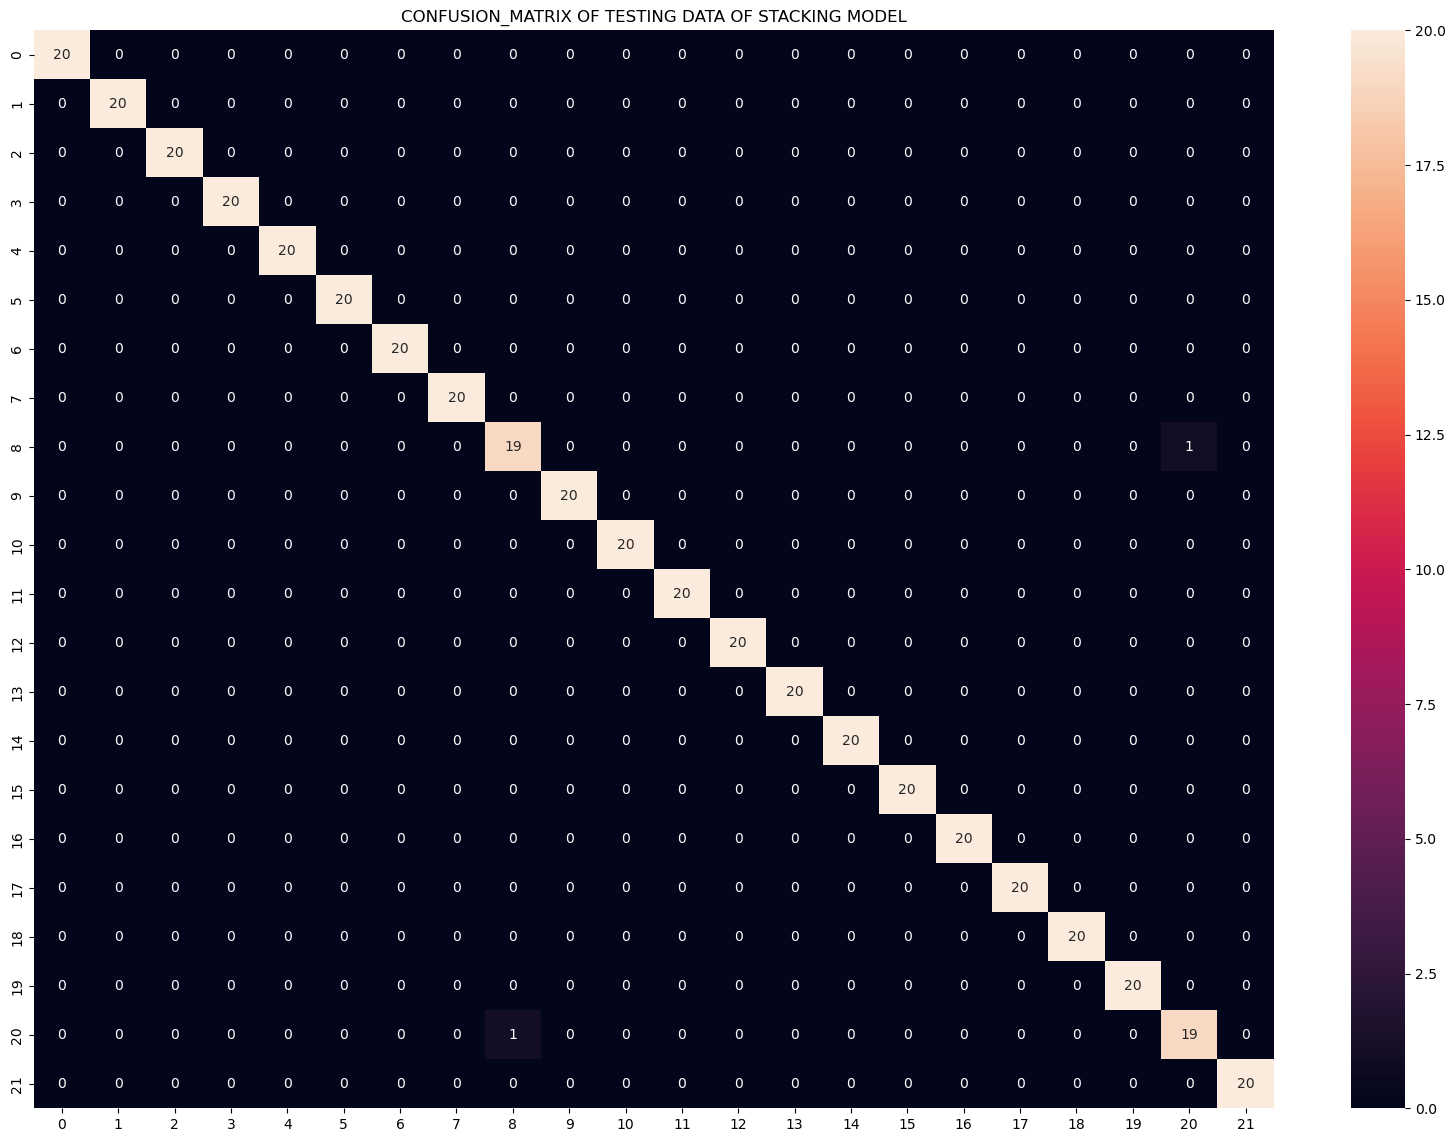

In [82]:
plt.figure(figsize=(20,14))
plt.title("CONFUSION_MATRIX OF TESTING DATA OF STACKING MODEL")
sns.heatmap(cmst,annot=True)

# MODELS ACCURACY SCORES

In [83]:
training_accuracy_scores=pd.DataFrame({"log":[log_model_training_accuracy_score],"knn":[knc_model_training_accuracy_score],"naive":[naive_model_training_accuracy_score],"DTC":[tree_model_training_accuracy_score],"Stacking":[stack_model_training_accuracy_score]})
training_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.976136,0.992045,0.995455,0.990909,0.998295


In [84]:
testing_accuracy_scores=pd.DataFrame({"log":[log_model_testing_accuracy_score],"knn":[knc_model_testing_accuracy_score],"naive":[naive_model_testing_accuracy_score],"DTC":[tree_model_testing_accuracy_score],"Stacking":[stack_model_testing_accuracy_score]})
testing_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.972727,0.984091,0.995455,0.990909,0.995455


In [85]:
df_accuracy_scores=pd.concat([training_accuracy_scores,testing_accuracy_scores])
df_accuracy_scores

,log,knn,naive,DTC,Stacking
0,0.976136,0.992045,0.995455,0.990909,0.998295
0,0.972727,0.984091,0.995455,0.990909,0.995455


In [86]:
df_accuracy_scores.set_index(pd.Index(["Training_scores","Testing_scores"]))

,log,knn,naive,DTC,Stacking
Training_scores,0.976136,0.992045,0.995455,0.990909,0.998295
Testing_scores,0.972727,0.984091,0.995455,0.990909,0.995455
